<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/6_classical_machine_learning/3_classification_1.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/6_classical_machine_learning/3_classification_1.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://github.com/AmirMardan'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Classification 1

In a classification problem, we need to predict the label of a sample which is a discrete value (class).
There are different methods to train a model for predicting the class of data samples.
In this notebook, we learn how to use 

- Logistic regression
- Support vector machine (SVM)
- Random forest method
- Confusion matrix

This notebook will cover the following topics:

- [1. Data Preparation](#preparation)
- [2. Logistic Regression](#logistic_regression)
- [3. Support Vector Machine](#svm)
- [4. Random Forest Classifier](#random_forest)

This notebook is created to classify handwritten digits. Let's import required packages and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
print('X: ', X.shape)
print('y: ', y.shape)


X:  (1797, 64)
y:  (1797,)


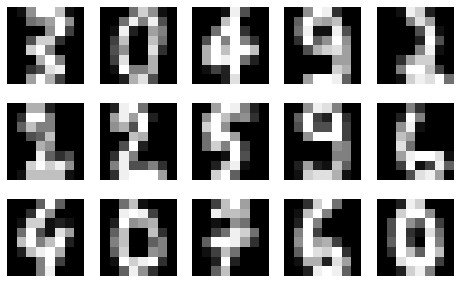

In [3]:
fig, ax = plt.subplots(3, 5, figsize=(8, 5),
                       sharex=True, sharey=True)

idx = np.random.randint(0, X.shape[0], 15)
for i, ax in enumerate(ax.flat):
    
    ax.imshow(X[idx[i], :].reshape(8, 8), cmap='gray')
    ax.axis('off')
    

<a id='preparation'></a>
## 1. Data Preparation

In [4]:
from sklearn.model_selection import train_test_split

X /= X.max()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=1)

print('Train: ', X_train.shape)
print('Test: ', X_test.shape)

Train:  (1527, 64)
Test:  (270, 64)


<a id='logistic_regression'></a>
## 2. Logistic Regression

Logistic regression model takes advantage of a logistic function to put the output of a linear equation between 0 and 1.
This logistic function is called the sigmoid function.

$
\hat y = \frac{1}{1 + e^{-z}}
$

<center>
<img src='https://miro.medium.com/max/389/1*AfEJcd0kq6xUnoaWG8SyTg.png'>
</center>


The sigmoid function returns a probability score between 0 and 1. In order to map this score to a categorical class, we define a threshold value

\begin{equation}
\begin{cases}
p \geq 0.5, \quad \text{class } 1\\
p < 0.5, \quad \text{class } 0\\
\end{cases}
\end{equation}

Logistic regression uses the cross-entropy cost function as

\begin{equation}
J(y, \hat y) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)} log(\hat y^{(i)}) + (1 - y^{(i)}) log(1 - \hat y^{(i)})].
\end{equation}


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


/Users/amir/repos/venv/AI/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Confusion Matrix**

Using confusion matrix, we can see how the model works and which labels are making trouble for model to predict correctly.

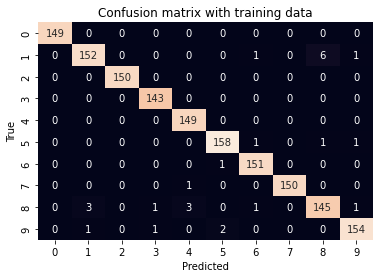

In [6]:
from sklearn.metrics import confusion_matrix

y_pred = log_model.predict(X_train)

def confusion_matrix_plot(y_pred, y_true):
    ax = sns.heatmap(confusion_matrix(y_true, y_pred),
                annot=True, fmt='d', cbar=False)

    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion matrix with training data');
    
    
confusion_matrix_plot(y_train, y_pred)
    



We can also measure the score of the model using `accuracy_score` which shows the best model with a score of 1.

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score


print(f'Score: {accuracy_score(y_train, y_pred, normalize=True)}')

Score: 0.982973149967256


Score: 0.9777777777777777


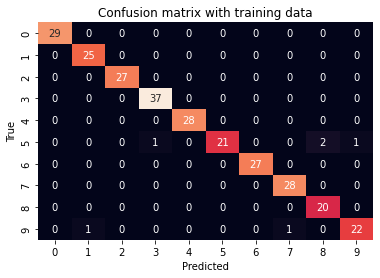

In [8]:
y_pred = log_model.predict(X_test)

confusion_matrix_plot(y_test, y_pred)


print(f'Score: {accuracy_score(y_test, y_pred)}')

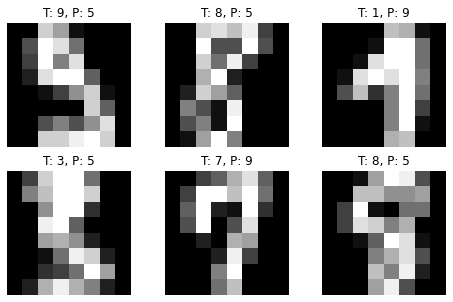

In [9]:
def wrong_classified_plot(X_true, y_true, y_pred):
    idx = y_true != y_pred
    X_wrong = X_true[idx]

    n_wrong = X_wrong.shape[0]


    fig, ax = plt.subplots(2, int(n_wrong/2), figsize=(8, 5),
                        sharex=True, sharey=True)

    for i, ax in enumerate(ax.flat):
        
        ax.imshow(X_wrong[i, :].reshape(8, 8), cmap='gray')
        ax.axis('off')
        ax.set_title(f'T: {y_true[idx][i]}, P: {y_pred[idx][i]}')
        
        
wrong_classified_plot(X_test, y_test, y_pred)

<a id='svm'></a>
## 3. Support Vector Machine

Support vector machines (SVMs) are kernel-based machine learning methods that can be used for classification and regression.
The point about SVMs is that they use the hyperplane that has the maximum distance to the data points.

<center>
<img src='./img/hyperplane.png' width='400px' alt='hyperplane'>
</center>



In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=.01)
svm.fit(X_train, y_train)



SVC(C=0.01, kernel='linear')

Score: 0.9423706614276359


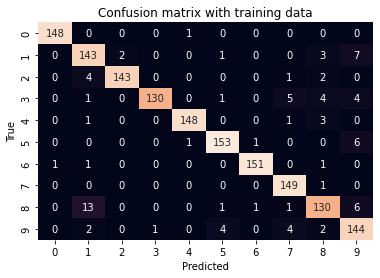

In [11]:
y_pred = svm.predict(X_train)

confusion_matrix_plot(y_pred, y_train)

print(f'Score: {accuracy_score(y_train, y_pred)}')


Score: 0.9555555555555556


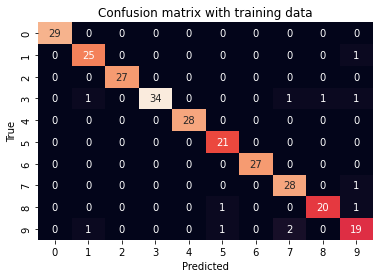

In [12]:
y_pred = svm.predict(X_test)

confusion_matrix_plot(y_pred, y_test)

print(f'Score: {accuracy_score(y_test, y_pred)}')

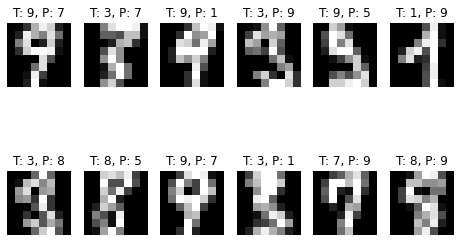

In [13]:
wrong_classified_plot(X_test, y_test, y_pred)

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['poly', 'linear'],
    'C':[0.01, 1, 10],
    'gamma':[1,0.1,0.01], 
    'degree':[2,3,4],
}

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END .............C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END .............C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=2, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........C=0.01, degree=2, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........C=0.01, degree=2, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........C=0.01, degree=2, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........C=0.01, degree=2, gamma=1, kernel=linear; total time=   0.1s
[CV] END ...........C=0.01, degree=2, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=2, gamma=0.1

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.01, 1, 10], 'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'linear']},
             verbose=2)

Score: 0.9888888888888889


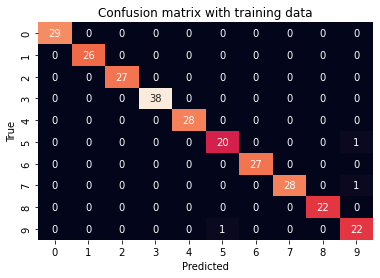

In [15]:
svm = grid_search.best_estimator_

y_pred = svm.predict(X_test)

confusion_matrix_plot(y_pred, y_test)

print(f'Score: {accuracy_score(y_test, y_pred)}')

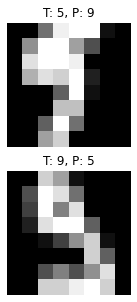

In [16]:
wrong_classified_plot(X_test, y_test, y_pred)

<a id='random_forest'></a>
## 4. Random Forest Classifier

Random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

<center>
    <img src='./img/random-forest-diagram.png' slt='random_forest', width='400px'>
</center>

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)


RandomForestClassifier()

Score: 1.0


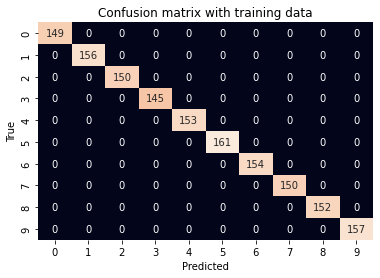

In [18]:
y_pred = rfc_model.predict(X_train)

confusion_matrix_plot(y_pred, y_train)

print(f'Score: {accuracy_score(y_train, y_pred)}')

Score: 0.9777777777777777


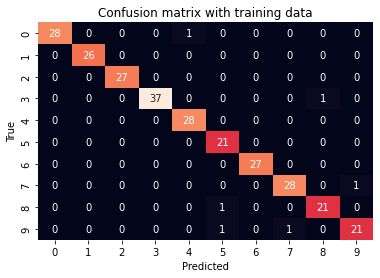

In [19]:
y_pred = rfc_model.predict(X_test)

confusion_matrix_plot(y_pred, y_test)

print(f'Score: {accuracy_score(y_test, y_pred)}')

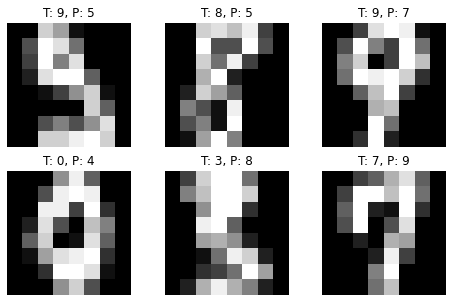

In [20]:
wrong_classified_plot(X_test, y_test, y_pred)

### [TOP ☝️](#top)